# A


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('query_result.csv')

# Calculate the mean of the 'volume' column
mean_volume = df['volume'].mean()

print(f"The mean of the volume is: {mean_volume}")

# Calculate the mean of the 'volume' column
mean_volume = df['volume'].mean()
print(f"The mean of the 'volume' column is: {mean_volume}")

sns.set(style="whitegrid")
# Ensure 'aggregate_by' is in datetime format
df['aggregate_by'] = pd.to_datetime(df['aggregate_by'])

# Calculate the mean of the 'volume' column
mean_volume = df['volume'].mean()
print(f"The mean of the 'volume' column is: {mean_volume}")

# Plot 'volume' vs 'aggregate_by' as a bar graph with an aesthetic color
plt.figure(figsize=(10, 6))
bars = plt.bar(df.index, df['volume'], color=sns.color_palette("muted")[0])

# Display the value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{round(yval/1e9, 2)}B", ha='center', va='bottom', fontsize=10)

# Set x-axis labels to show every 5th bar
plt.xticks(ticks=range(0, len(df), 5), labels=[df['aggregate_by'].dt.strftime('%m/%Y').iloc[i] for i in range(0, len(df), 5)])

plt.xlabel('Month')
plt.ylabel('volume')
plt.title('Volume vs Time')
# plt.xticks(rotation=45)
plt.grid(False, axis='both')  # or axis='x' or axis='y'

plt.show()


KeyError: 'volume'

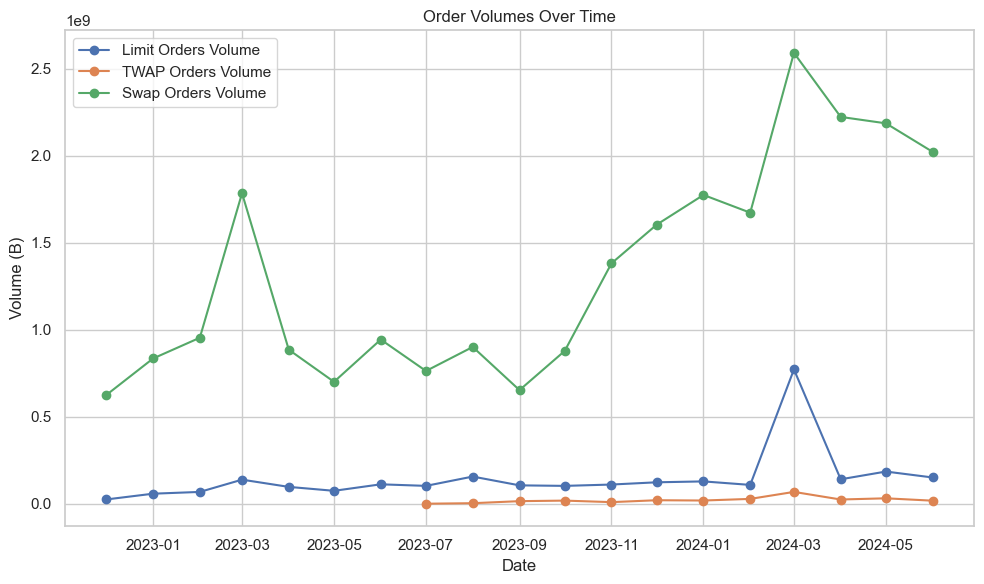

In [19]:
# Read the CSV file
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('query_result.csv')
df = df[df['aggregate_by'] < '2024-07-01']

# Ensure the 'aggregate_by' column is treated as datetime
df['aggregate_by'] = pd.to_datetime(df['aggregate_by'])

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(df['aggregate_by'], df['limit_orders_volume'], label='Limit Orders Volume', marker='o')
plt.plot(df['aggregate_by'], df['twap_orders_volume'], label='TWAP Orders Volume', marker='o')
plt.plot(df['aggregate_by'], df['swap_orders_volume'], label='Swap Orders Volume', marker='o')

# Adding titles and labels
plt.title('Order Volumes Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (B)')
plt.legend()
plt.grid(True)
# plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()



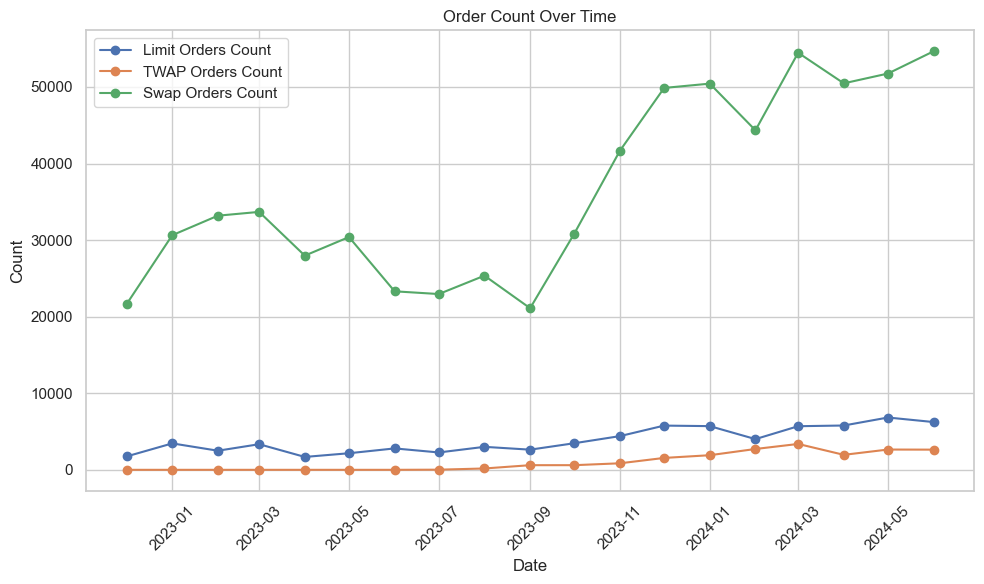

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('query_result.csv')

# Ensure the 'aggregate_by' column is treated as datetime
df['aggregate_by'] = pd.to_datetime(df['aggregate_by'])

# Filter the DataFrame to include only dates up to 2024-06
df = df[df['aggregate_by'] < '2024-07-01']

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(df['aggregate_by'], df['limit_orders_count'], label='Limit Orders Count', marker='o')
plt.plot(df['aggregate_by'], df['twap_orders_count'], label='TWAP Orders Count', marker='o')
plt.plot(df['aggregate_by'], df['swap_orders_count'], label='Swap Orders Count', marker='o')

# Adding titles and labels
plt.title('Order Count Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


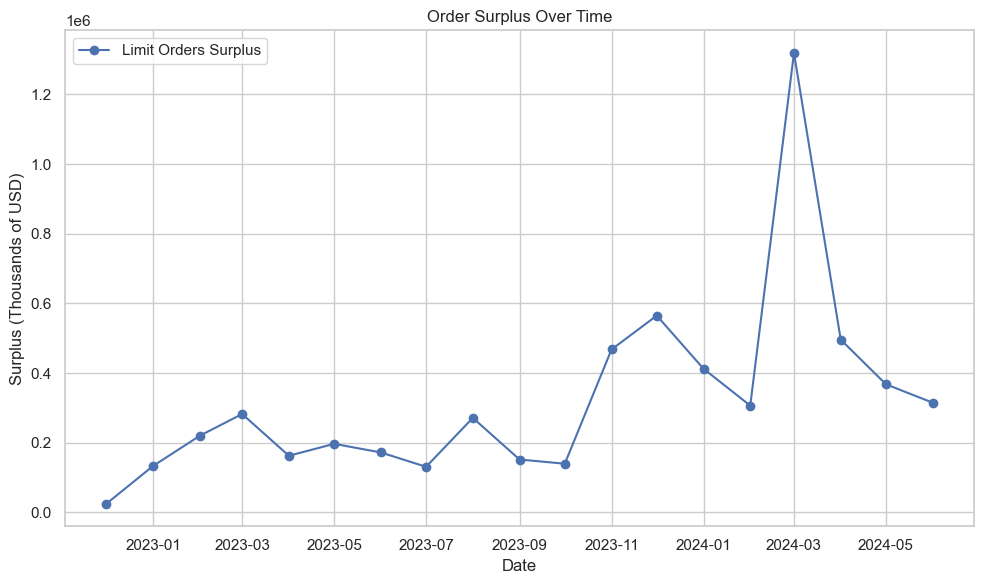

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('query_result.csv')

# Ensure the 'aggregate_by' column is treated as datetime
df['aggregate_by'] = pd.to_datetime(df['aggregate_by'])

# Filter the DataFrame to include only dates up to 2024-06
df = df[df['aggregate_by'] < '2024-07-01']

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(df['aggregate_by'], df['limit_orders_surplus'], label='Limit Orders Surplus', marker='o')

# Adding titles and labels
plt.title('Order Surplus Over Time')
plt.xlabel('Date')
plt.ylabel('Surplus (Thousands of USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()


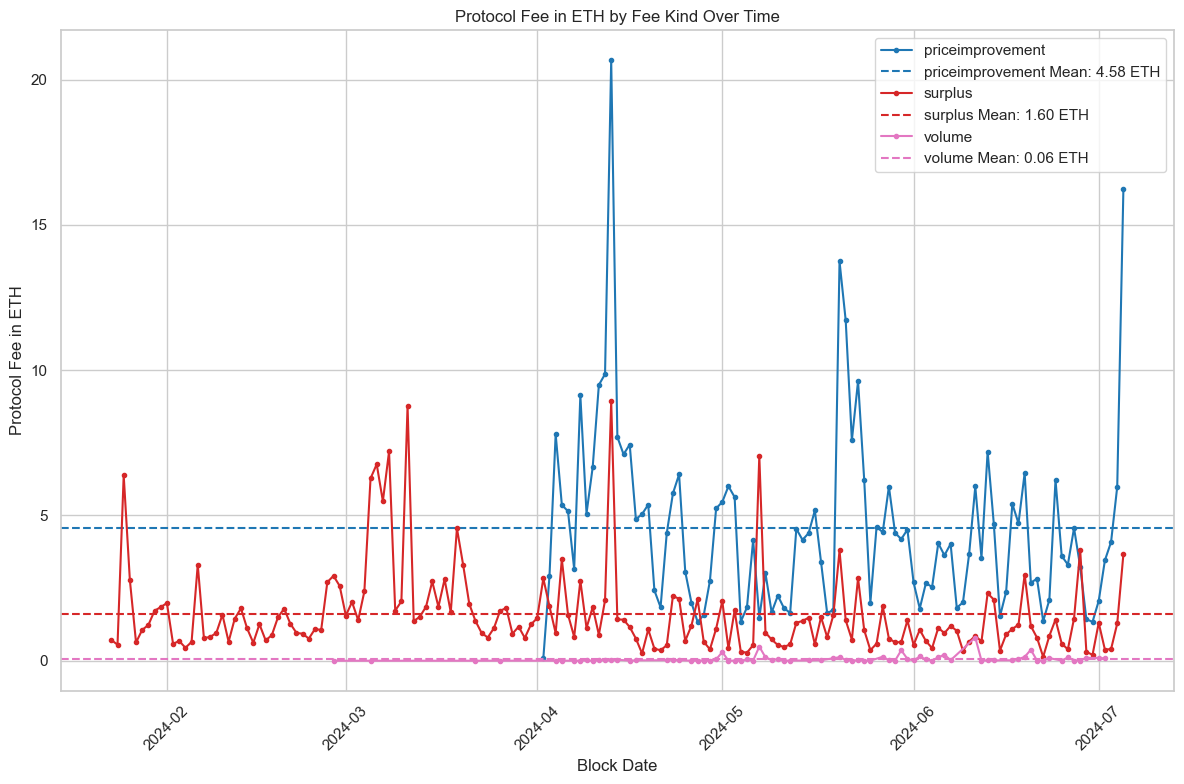

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('revenue.csv')

# Ensure the 'block_date' column is treated as datetime
df['block_date'] = pd.to_datetime(df['block_date'])

# Ensure the 'protocol_fee_kind' column is treated as categorical
df['protocol_fee_kind'] = df['protocol_fee_kind'].astype('category')

# Create a figure and a set of subplots
plt.figure(figsize=(12, 8))

# Define the protocol fee kinds
fee_kinds = df['protocol_fee_kind'].unique()

fee_kinds = [x for x in fee_kinds if pd.notna(x)]

# Define a color map
colors = plt.get_cmap('tab10')

# Plot data for each protocol_fee_kind
for i, fee_kind in enumerate(fee_kinds):
    subset = df[df['protocol_fee_kind'] == fee_kind].dropna(subset=['protocol_fee_in_eth'])
    color = colors(i / len(fee_kinds))
    plt.plot(subset['block_date'], subset['protocol_fee_in_eth'], label=fee_kind, marker='.', color=color)

    # Calculate and display the mean protocol fee in ETH
    mean_fee = subset['protocol_fee_in_eth'].mean()
    plt.axhline(y=mean_fee, linestyle='--', color=color, label=f'{fee_kind} Mean: {mean_fee:.2f} ETH')

# Adding titles and labels
plt.title('Protocol Fee in ETH by Fee Kind Over Time')
plt.xlabel('Block Date')
plt.ylabel('Protocol Fee in ETH')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


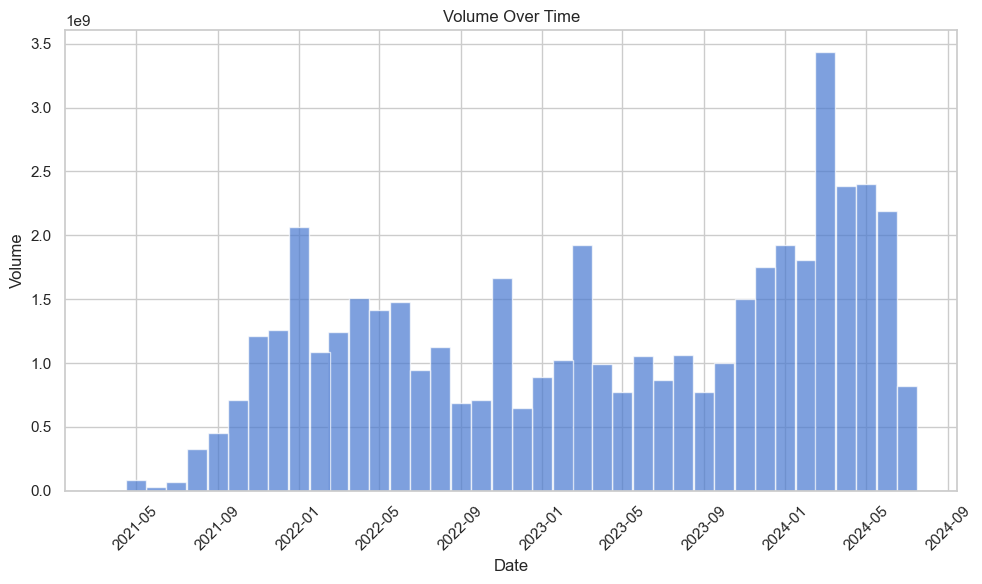

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('volume.csv')

# Convert the 'aggregate_by' column to datetime, removing the ' UTC' part
df['aggregate_by'] = pd.to_datetime(df['aggregate_by'].str.replace(' UTC', ''))

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df['aggregate_by'], df['volume'], width=30, align='center', alpha=0.7, color=sns.color_palette("muted")[0])

# Adding titles and labels
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()
